In [57]:
# importing the necessary libraries for the analysis 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

let's get started by importing Bitcoin and Ether data:

In [58]:
df = pd.read_csv('data/btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

In [59]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


And now we run a simple visualization

<Axes: xlabel='Timestamp'>

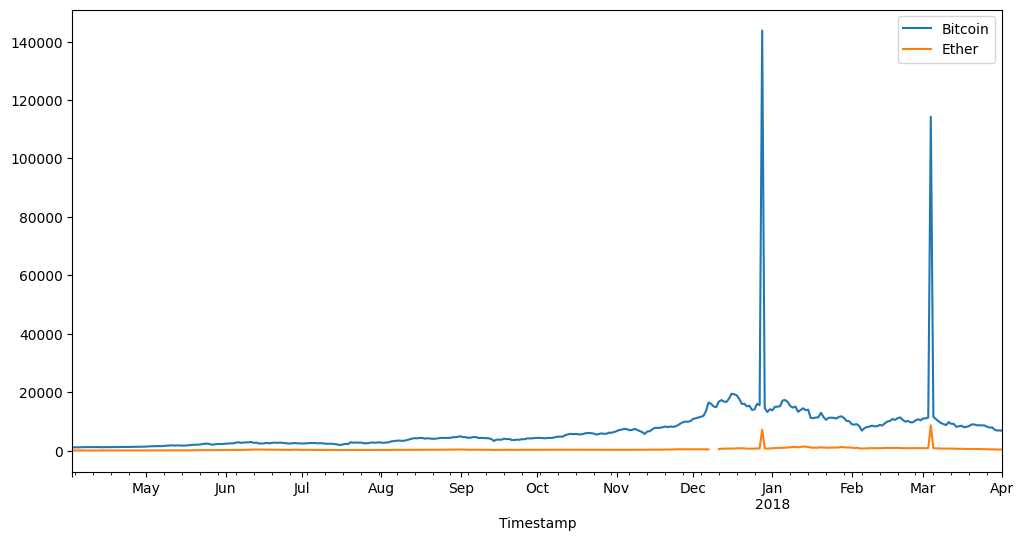

In [60]:
df.plot(figsize=(12, 6))

There was clearly some invalid values, both ETH and BTC have huge spikes. On top of that there seems to be some data missing in Ether between  December 2017 and January 2018

<Axes: xlabel='Timestamp'>

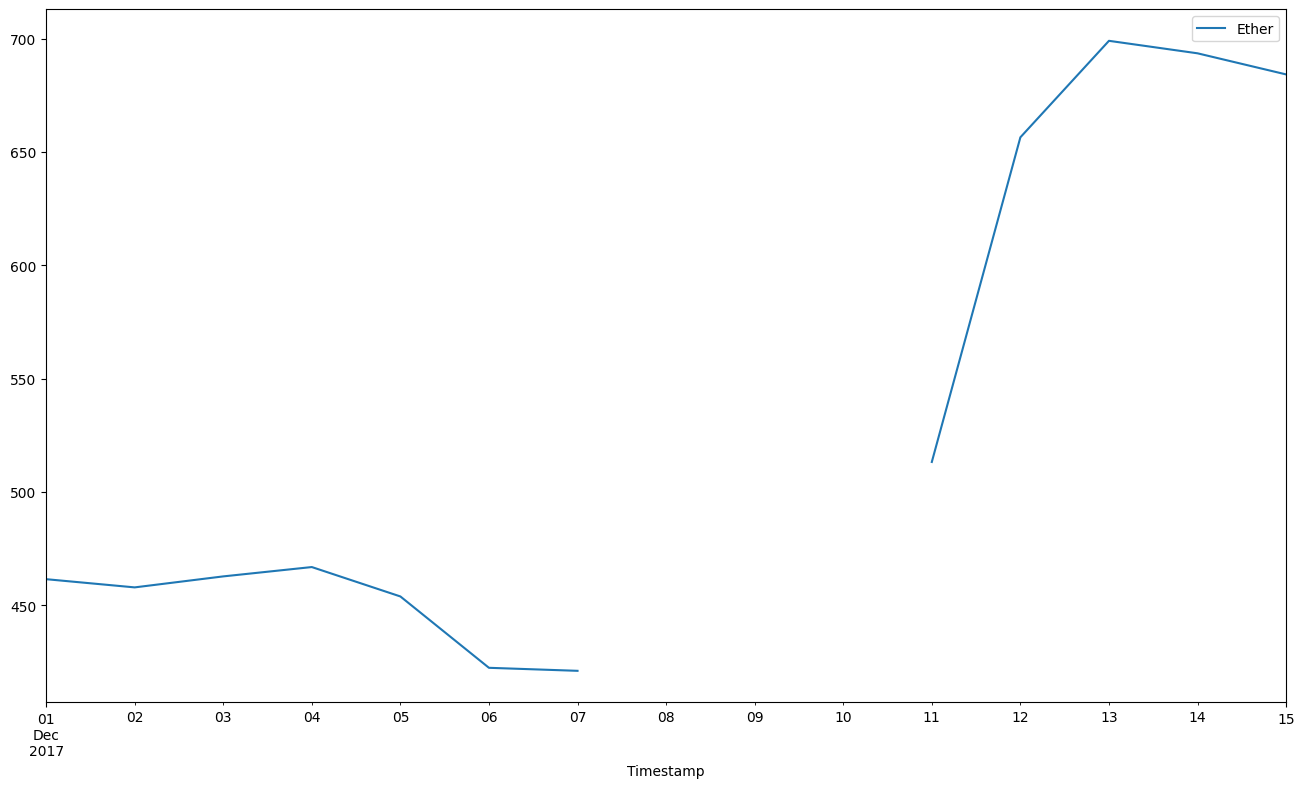

In [61]:
df.loc['2017-12':'2017-12-15'].plot(y='Ether', figsize=(16, 9))

In [62]:
df_na = df.loc['2017-12':'2017-12-15']

Are those null values?

In [63]:
df_na['Ether'].isna().values.any()

True

When? what period of time?

In [64]:
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


lets add a bot more context

In [65]:
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


We now need to decide what we'll do with the missing values Drop them? fill them? if we decide to fill them, what will be used as fill values? For example: we can use the previous value and just assume the price stayed the same.

In [66]:
df.loc['2017-12-06':'2017-12-12'].fillna(method='bfill')

C:\Users\mwate mulenga\AppData\Local\Temp\ipykernel_18376\41774692.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc['2017-12-06':'2017-12-12'].fillna(method='bfill')


,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [67]:
df.fillna(method='bfill', inplace=True)

C:\Users\mwate mulenga\AppData\Local\Temp\ipykernel_18376\3314729575.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


Let's take a look now 

<Axes: xlabel='Timestamp'>

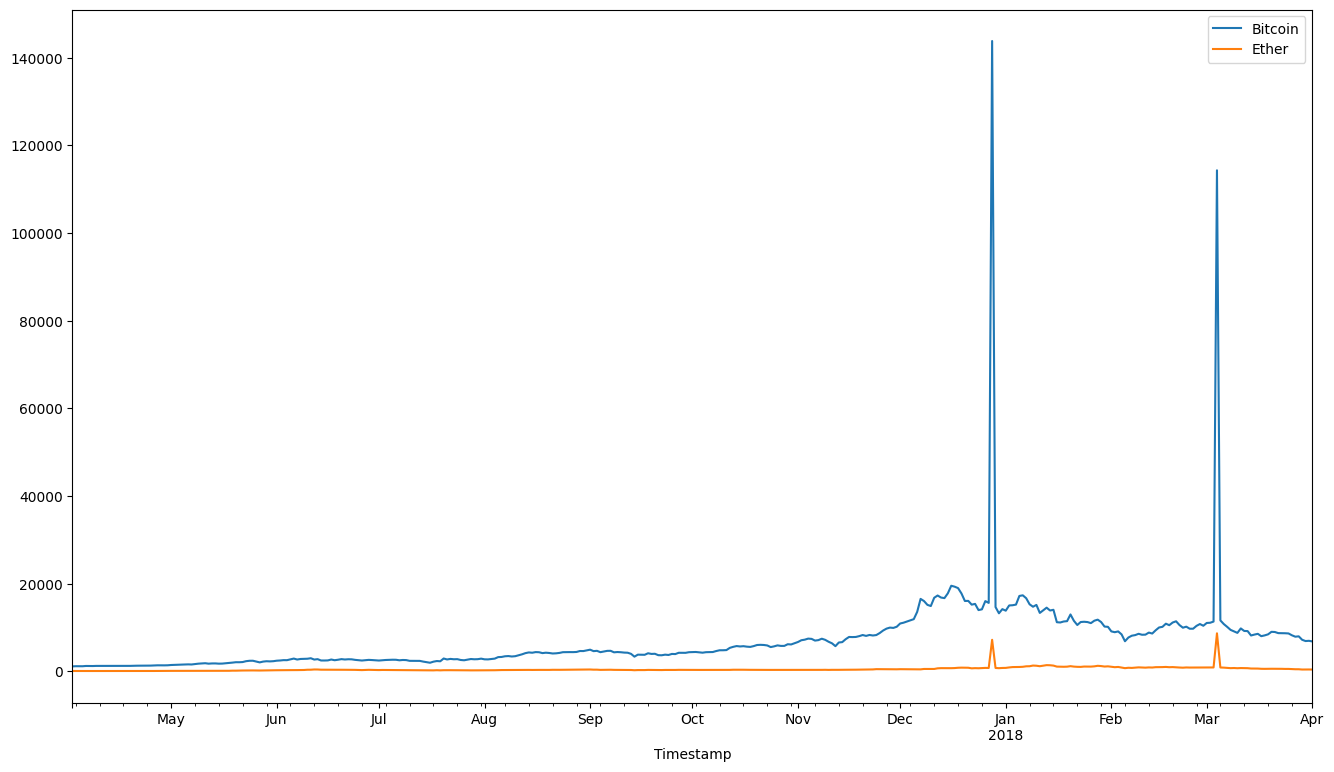

In [68]:
df.plot(figsize=(16,9))

Much better. We now need to fix the huge spikes. The first step is identifying them. How can we do it? The simple answer is of course visually. They seem to be located in the last 10 days of Dec 2017 and first of March 2018:

<Axes: xlabel='Timestamp'>

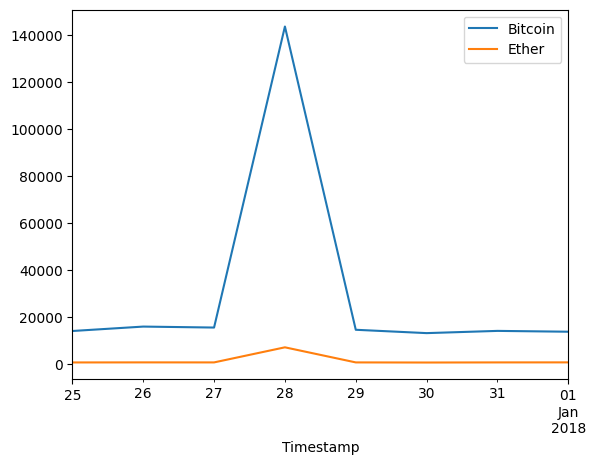

In [69]:
df['2017-12-25':'2018-01-01'].plot()

<Axes: xlabel='Timestamp'>

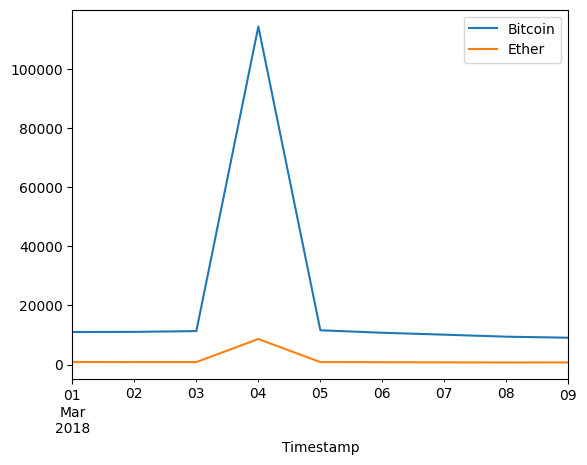

In [70]:
df['2018-03-01':'2018-03-09'].plot()

Apparently, they're located in '2017-12-28' and '2018-03-04':

In [71]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))

<Axes: xlabel='Timestamp'>

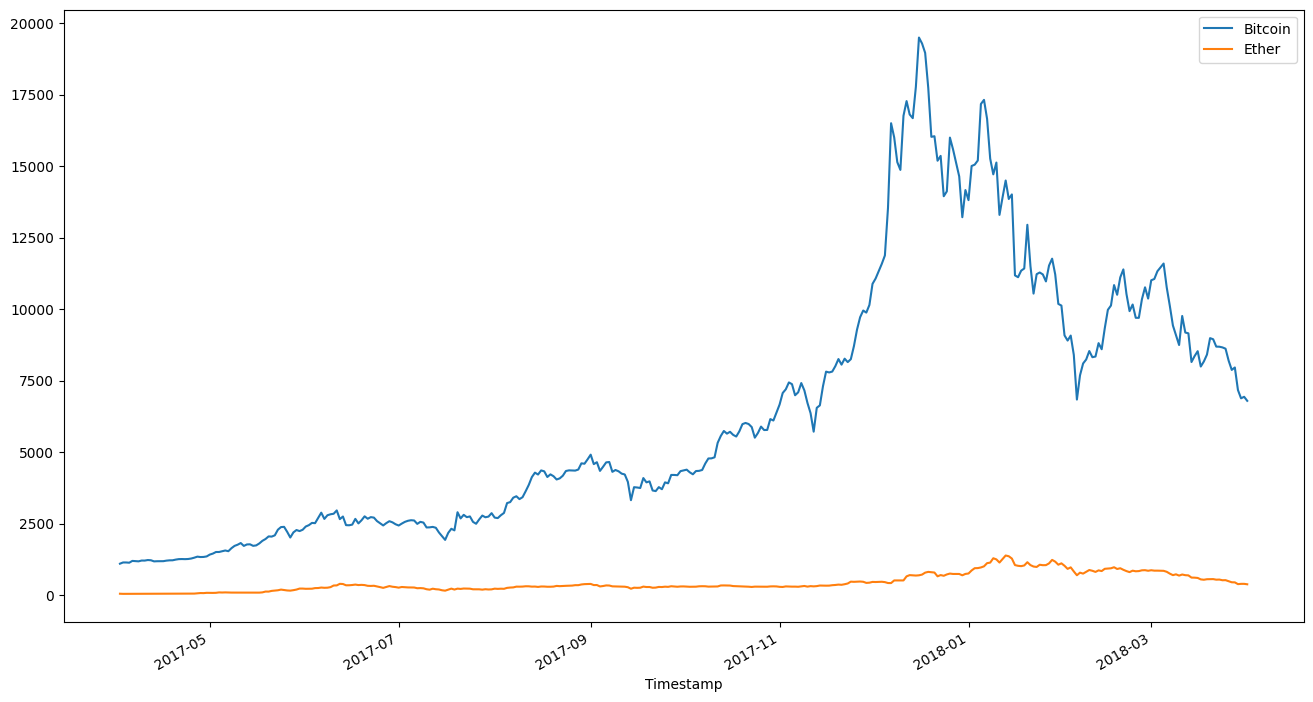

In [72]:
df_cleaned.plot(figsize=(16, 9))

Now it looks much better. Our data seems to be clean.

## **Cleaning Analysis**

Visualizations helps make sense of the data and let us judge if our analysis and work is on the right track. But we need a more powerful method to handle our data. That's what we call "analysis". We'll use analytical methods to identify these outliers or these skewed values.

**Central Tendancy**

We'll use a set of common indicators of to measure central tendancy and identify these outliers

**mean**

The mean is probably the most common and popular one. The problem is that it's really senstive  to outliers. The mean of our dataset with invalid values is:

In [73]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

Both values seem to high. That's because the outliers are skewing with the mean:

In [74]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

**median**

In [75]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

**mode**

it doesn't make much sense to measure the mode, as we have continued values But can do it just with df.mode

# **Visualizing distribution**
Now we can use a few of charts, seaborn to visualize the distribution of our values.in particular, we're interested in __histograms__

<Axes: ylabel='Frequency'>

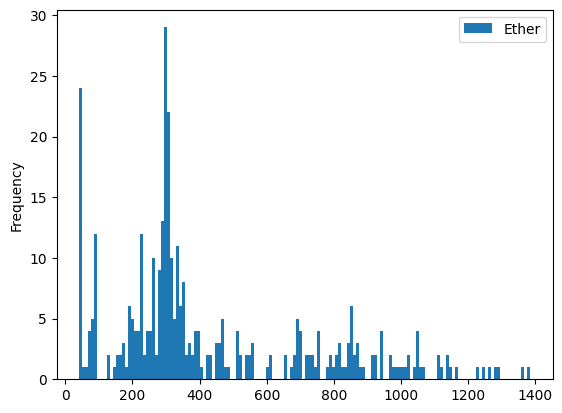

In [76]:
df_cleaned.plot(kind='hist', y='Ether', bins=150)

<Axes: ylabel='Frequency'>

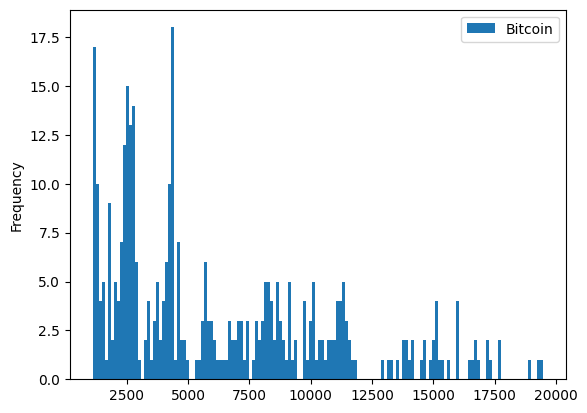

In [77]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150)

__using seaborn__

C:\Users\mwate mulenga\AppData\Local\Temp\ipykernel_18376\569520307.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Ether'], ax=ax)


<Axes: xlabel='Ether', ylabel='Density'>

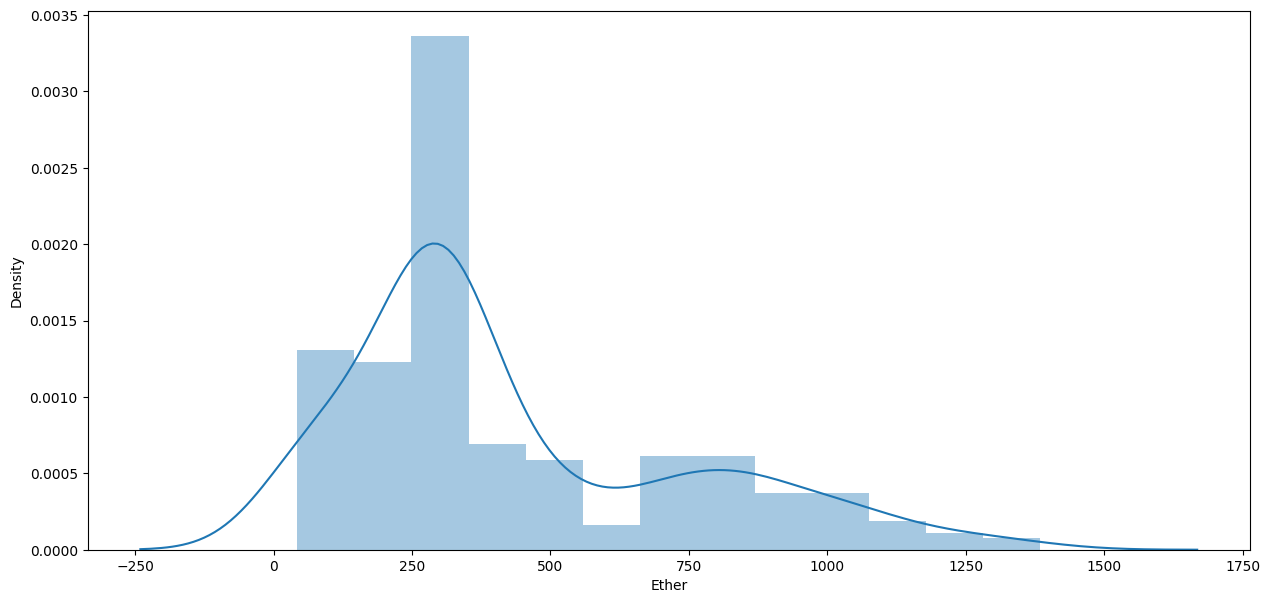

In [78]:

fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Ether'], ax=ax)



c:\Users\mwate mulenga\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


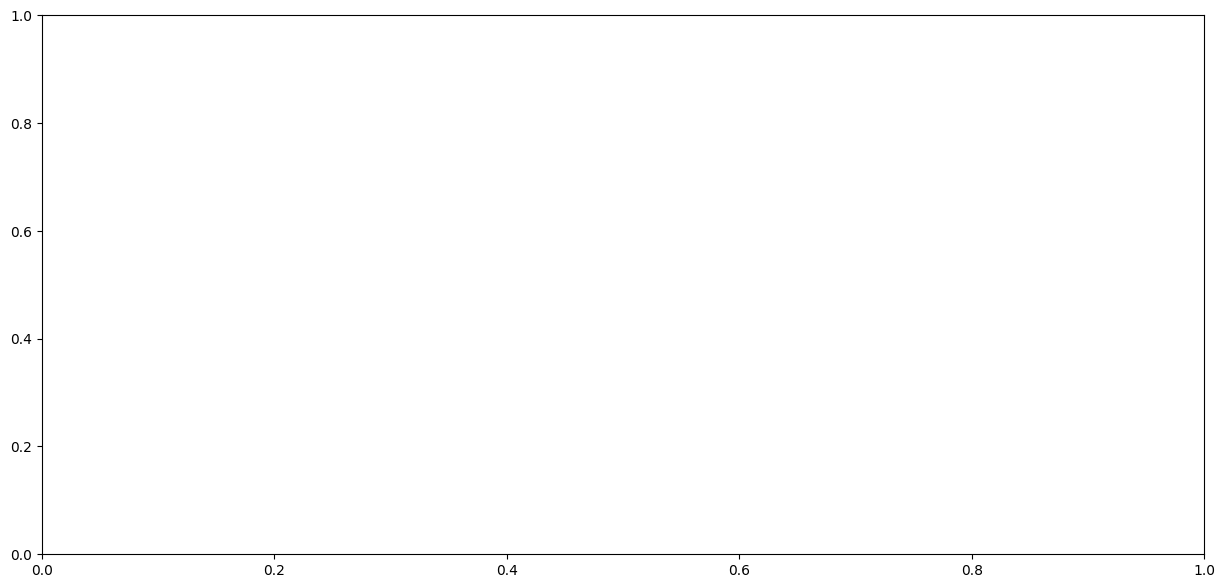

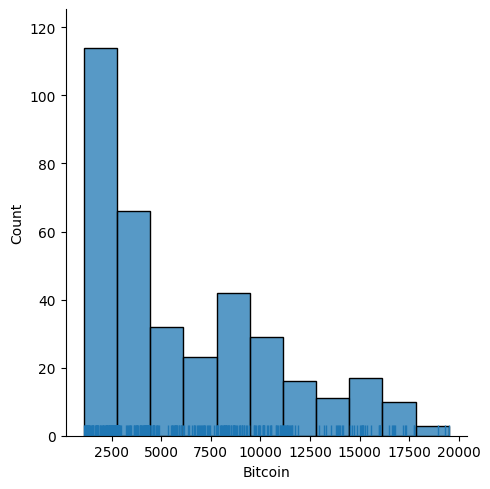

In [79]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.displot(df_cleaned['Bitcoin'],  rug=True, ax=ax)

Seaborn's displot is a general method that will plot a histogram, a KDE and a rugplot. You can also use them as seperate

C:\Users\mwate mulenga\AppData\Local\Temp\ipykernel_18376\2139740591.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax =ax)


<Axes: xlabel='Ether', ylabel='Density'>

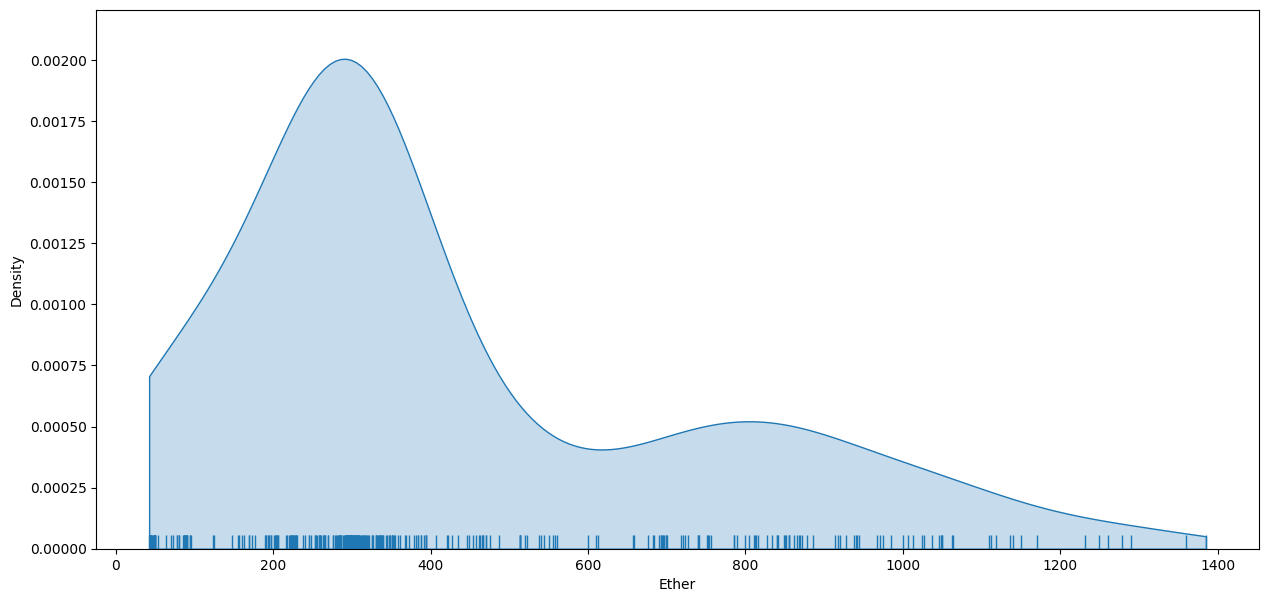

In [80]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax =ax)
sns.rugplot(df_cleaned['Ether'], ax =ax)

We can also Visualize a cumulative plot of our distribution

C:\Users\mwate mulenga\AppData\Local\Temp\ipykernel_18376\2238239804.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'], ax=ax,


<Axes: xlabel='Bitcoin', ylabel='Density'>

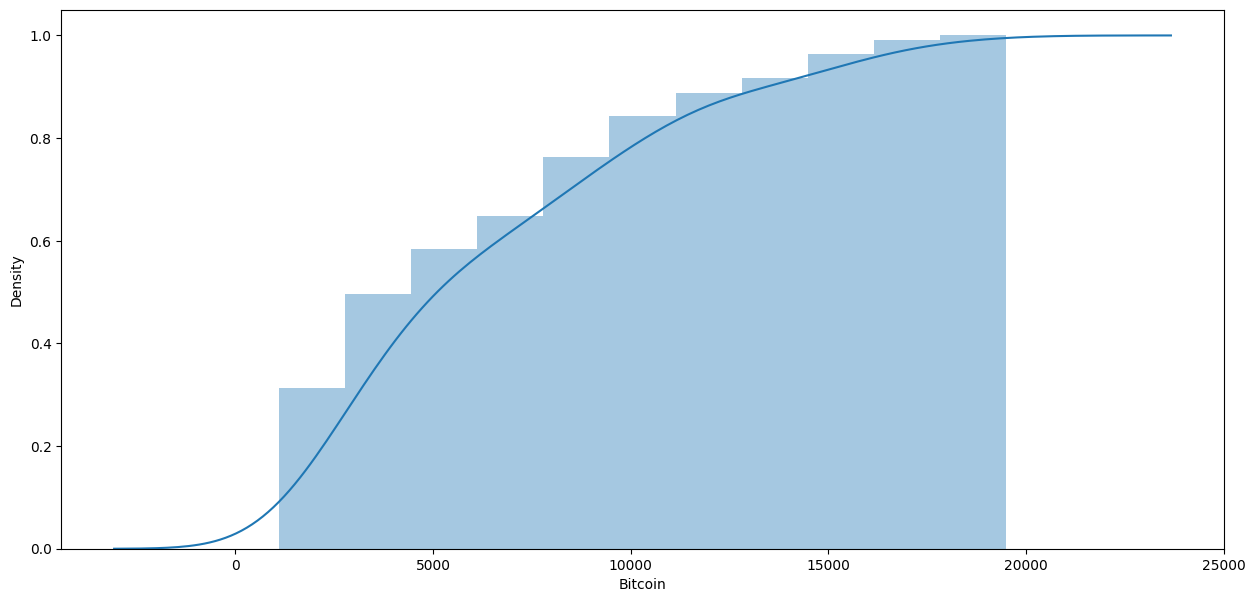

In [81]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))